In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/MyDrive/DataFiles/"


Mounted at /content/drive
CustomerPredictionTrain


In [2]:
import pandas as pd
import numpy as np
# importing important libraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DataFiles/CustomerPredictionTrain/train.csv")

In [4]:
print("Shape of the training dataset--", df.shape)

Shape of the training dataset-- (4459, 4993)


In [5]:
df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [7]:
#checking how many type of feature are available
df.dtypes.value_counts()

int64      3147
float64    1845
object        1
dtype: int64

In [8]:
df.select_dtypes("object").dtypes

ID    object
dtype: object

In [9]:
#checking if the ID values are unique or not
print("unique values in training ID feature-------------",df["ID"].nunique())
print("Total number of datapoints in training dataset---",df.shape[0])

unique values in training ID feature------------- 4459
Total number of datapoints in training dataset--- 4459


## Exploratory Data Analysis

In [10]:
# once we confirm that ID features have no duplicates we can remove it
# separating the feature matrix and label vector

label = df['target']
features = df.drop(["ID","target"], axis=1)

print("Shape of the feature matrix-----",features.shape)
print("Shape of the label vector-------",label.shape)

Shape of the feature matrix----- (4459, 4991)
Shape of the label vector------- (4459,)


In [11]:
# checking for the null values in training dataset
print("Training Dataset Null Values -------",df.isnull().sum().sum())

Training Dataset Null Values ------- 0


In [12]:
label.head()

0    38000000.0
1      600000.0
2    10000000.0
3     2000000.0
4    14400000.0
Name: target, dtype: float64

In [13]:
features.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [14]:
#statistics for the label vector
label.describe().T

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

#### Analysis of the target variable

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

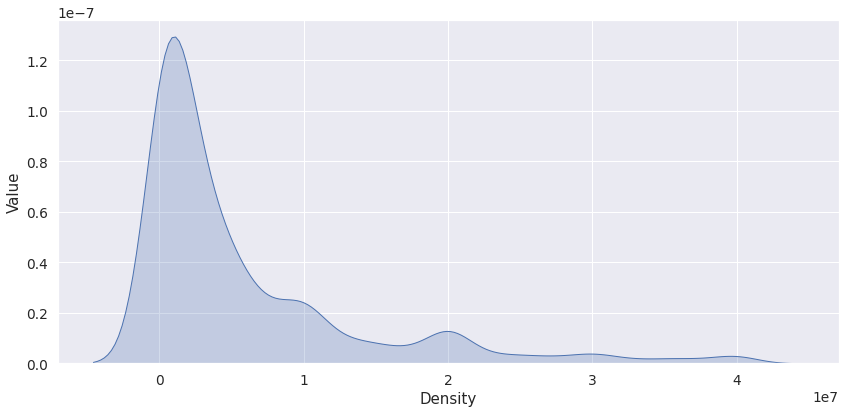

In [16]:
# setting up the seaborn style theme
sns.set_theme(context="notebook", style="darkgrid",palette="deep",
              font_scale=1.25, color_codes="dark")

#setting up the matplotlib figure
fig, axes = plt.subplots(figsize=(12,6),sharex=True)

#plotting the histogram of the label
sns.kdeplot(label, color="b",shade=True,ax=axes)
plt.xlabel("Density")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

The target variable is financial data therefore it is log normally distributed.
We can transform this data into normally distributed

In [17]:
# using the skew and kurtosis to measure the skewness
print(f"Skewness of the target variable----{label.skew():.2f}")
print(f"Kurtosis of the target variable----{label.kurt():.2f}")

Skewness of the target variable----2.09
Kurtosis of the target variable----4.24


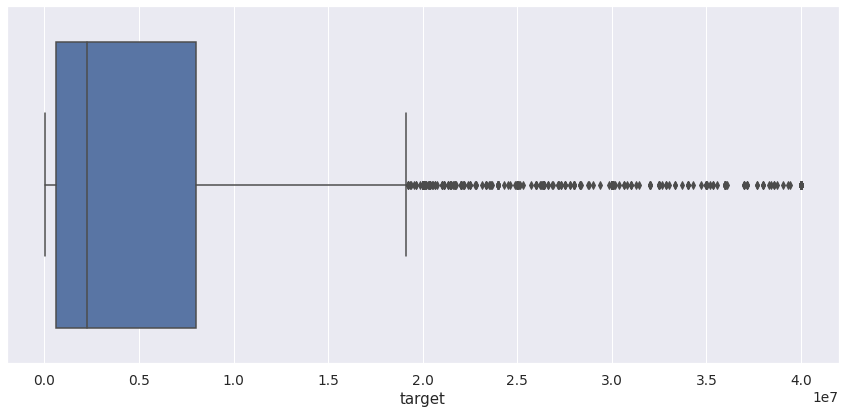

In [18]:
fig, axes = plt.subplots(figsize=(12,6), sharex=True)

#using the boxplot to find the outliers
sns.boxplot(x=label,ax=axes)

plt.tight_layout()
plt.show()

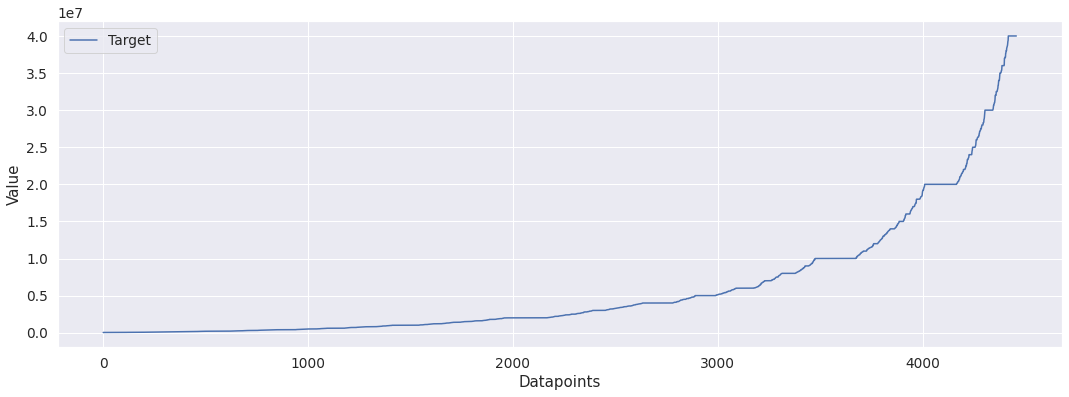

In [19]:
# plotting the label
# converting the label values to an array

x=np.array(label)
x.sort()

plt.figure(figsize=(18,6))
plt.plot(x,color='b')
plt.title("")

plt.ylabel("Value")
plt.xlabel("Datapoints")
plt.legend(['Target'], loc="upper left")
plt.show()

The financial data is log normally distributed, therefore we cannot rule out the outliers

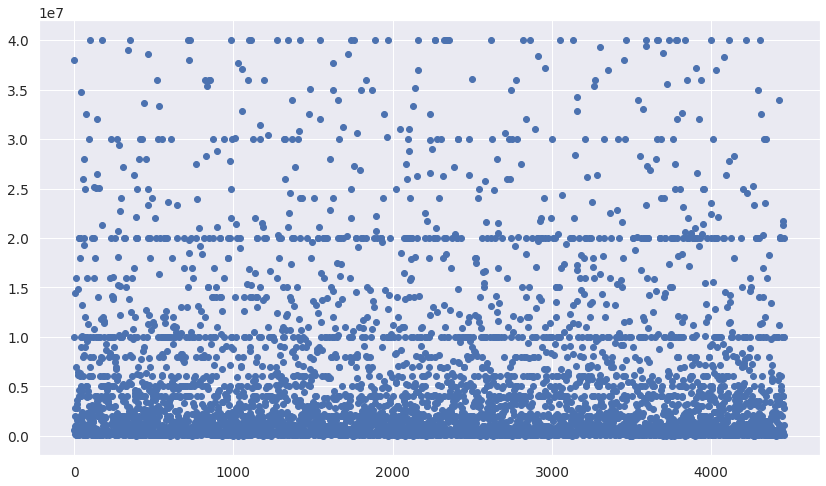

In [20]:
# scatter plot of the target variable to check the outliers
plt.figure(figsize=(14,8))
plt.scatter(x = range(df.shape[0]), y=label)
plt.show()

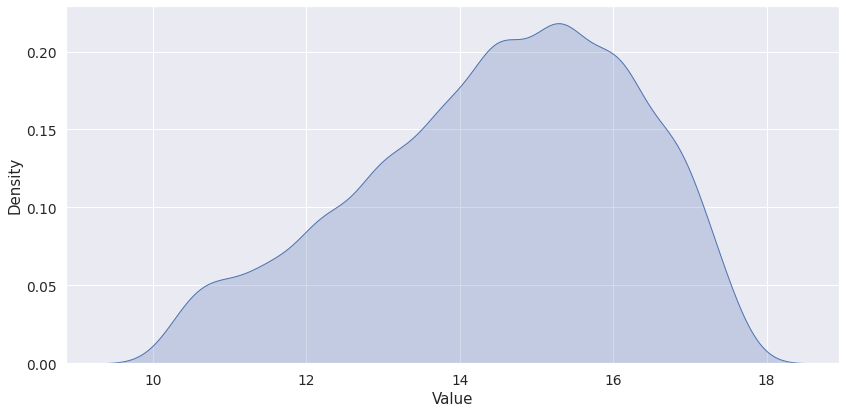

In [21]:
# applying log transformation to the label vector
fig, axes = plt.subplots(figsize=(12,6), sharex=True)

sns.kdeplot(np.log1p(label), color='b', shade=True, ax=axes)
plt.ylabel("Density")
plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [22]:
# getting the skewness and kurtosis of the log transformation of the label
print(f"Skewness of the log transformation of label: {np.log1p(label).skew():.2f}")
print(f"Kurtosis of the log transformation of label: {np.log1p(label).kurt():.2f}")

Skewness of the log transformation of label: -0.42
Kurtosis of the log transformation of label: -0.59


#### Analysis of the features of training dataset

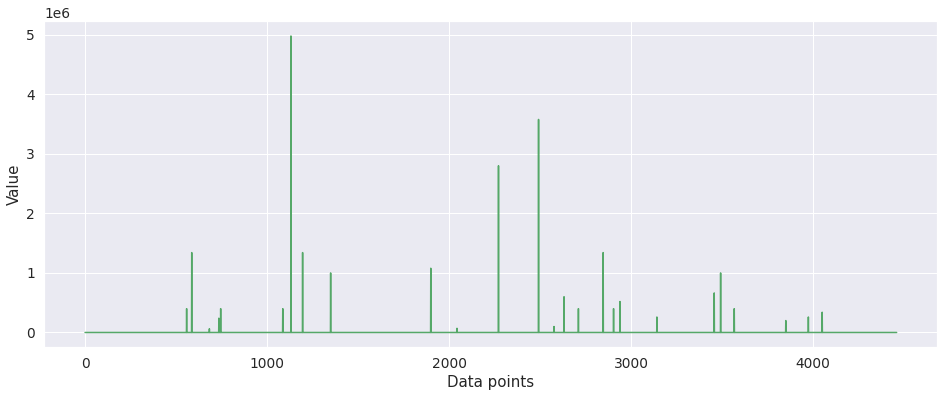

In [23]:
# plotting the datapoints and their value of a random feature
x = np.array(features[features.columns[1101]])

plt.figure(figsize=(16,6))
plt.plot(x,color = 'g')

plt.ylabel('Value')
plt.xlabel('Data points')
plt.show()

# a large number of points are missing

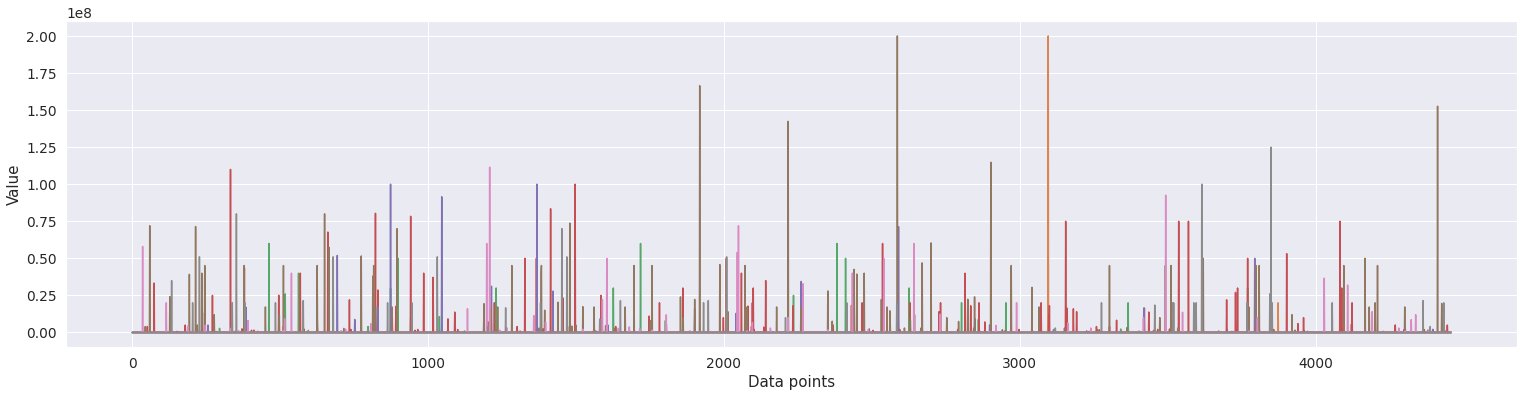

In [24]:
# plotting several data points randomlny to check for the sparsity
# and the variation in the scale which was evident in the above diagram
x = np.array(features[features.columns[1000:1008]])

plt.figure(figsize=(26,6))
plt.plot(x)

plt.title("")

plt.ylabel('Value')
plt.xlabel('Data points')
plt.show()

The above figure confirms that the data is highly sparse and the features varying in scale as well.

Checking the sparsity of the training and testing dataset

In [25]:
# function to check the sparsity of the dataset
def check_sparsity(df):
    non_zeros = df.ne(0).sum(axis=1).sum()
    total = df.shape[0]*df.shape[1]
    zeros = total-non_zeros
    sparsity = round(zeros/total*100,2)
    density = round(non_zeros/total*100,2)
    
    print("Total--------",total)
    print("Zeros--------",zeros)
    print(f"Sparsity----- {sparsity}%")
    print(f"Density------ {density}%",)

In [26]:
print("Sparsity Details of training Dataset")
check_sparsity(features)

Sparsity Details of training Dataset
Total-------- 22254869
Zeros-------- 21554760
Sparsity----- 96.85%
Density------ 3.15%


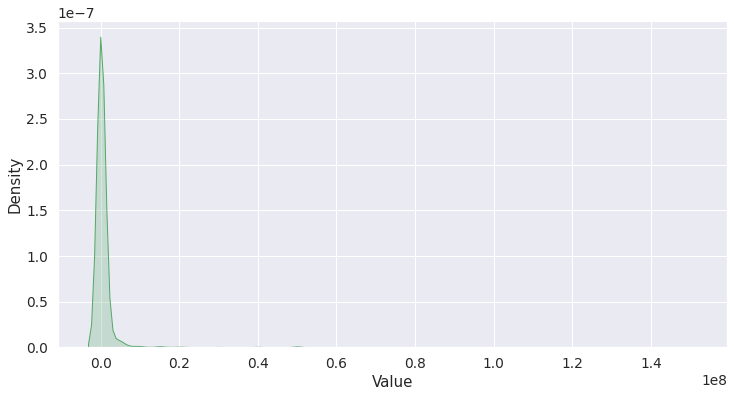

In [27]:
# plotting the distribution plot of a random feature
x = np.array(features[features.columns[108]])

fig,axes = plt.subplots(figsize=(12,6), sharex=True)

sns.kdeplot((x), color='g', shade=True, ax=axes)
plt.ylabel('Density')
plt.xlabel('Value')

plt.show()

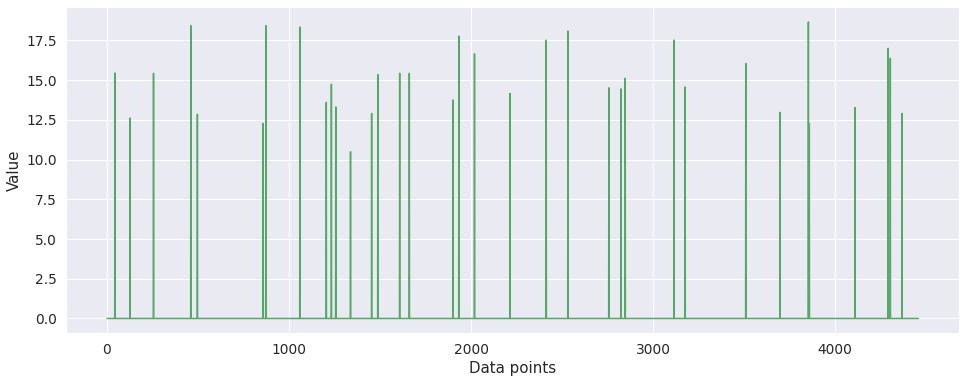

In [28]:
# plotting the same featuer after applying transformation
x = np.array(np.log1p(features)[np.log1p(features).columns[1088]])

plt.figure(figsize=(16,6))
plt.plot(x, color='g')

plt.title("")

plt.ylabel('Value')
plt.xlabel('Data points')
plt.show()

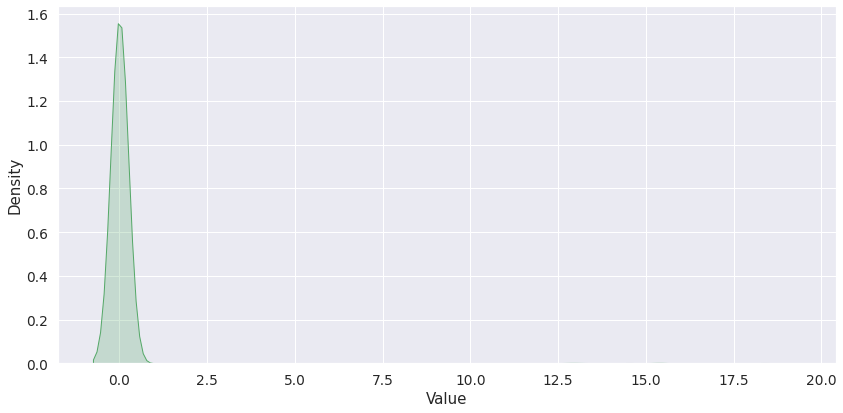

In [29]:
# plotting the histogram of the transformed feature
fig, axes = plt.subplots(figsize=(12,6), sharex = True)

sns.kdeplot(x, color = 'g' ,shade=True, ax=axes)
plt.ylabel('Density')
plt.xlabel('Value')

plt.tight_layout()

#### Bi-Variate Analysis

In [30]:
from sklearn.decomposition import PCA

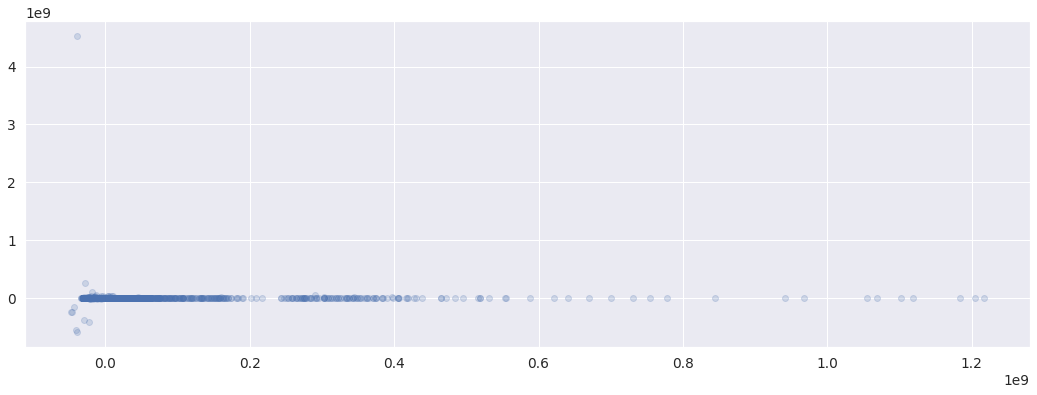

In [31]:
# to get a clear picture lets apply PCA dimensionality reduction
pca = PCA(n_components=40)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(18,6))

plt.scatter(features_pca[:,0],features_pca[:,1], alpha=0.2)
plt.show()

Due to scaling variation of the features we could not make much sense out of the scatter plot.Therefore we will use nplog

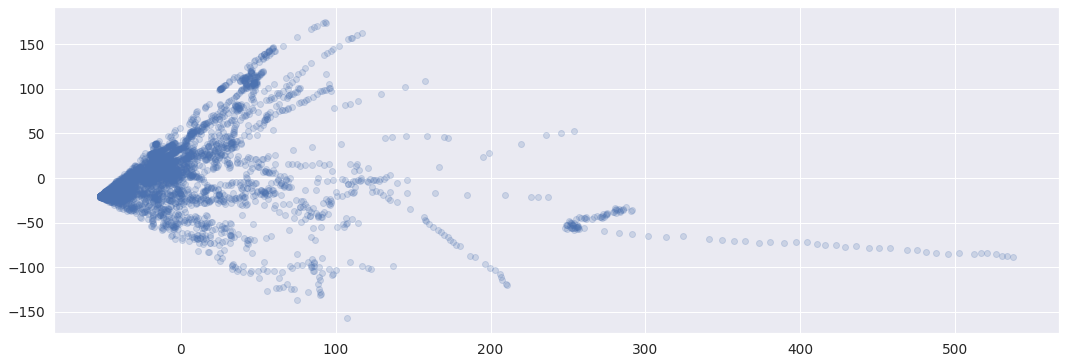

In [32]:
pca = PCA(n_components=40)
features_pca = pca.fit_transform(np.log1p(features))

plt.figure(figsize=(18,6))

plt.scatter(features_pca[:,0],features_pca[:,1], alpha=0.2)
plt.show()

from the above scatter plots it is evident that the log1p transformation is presenting better result

In [33]:
from sklearn.feature_selection import f_regression

In [34]:
corr= f_regression(features,label)

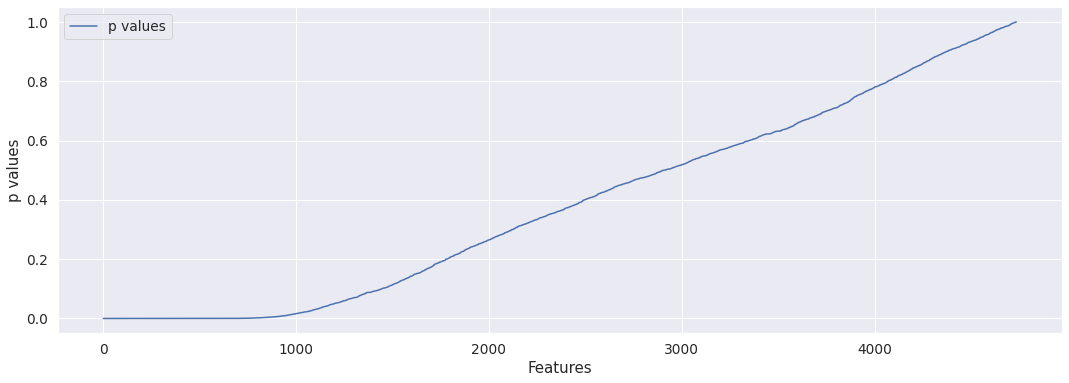

In [35]:
x = np.array(corr[1])
#arranging the p values in ascending order to figure out how many features are
# highly correlated
x.sort()


plt.figure(figsize=(18, 6))
plt.plot(x, color = "b")
plt.title('')
plt.ylabel('p values')
plt.xlabel('Features')
plt.legend(['p values'], loc='upper left')
plt.show()
### there are many variables with no correlation with target variable
# there are quite a few that correlate relatively well.

In [36]:
f_selection = (pd.DataFrame({'importance':corr[1], 'feature':features.columns}).
              sort_values(by=['importance'], ascending=False))
f_selection.head()

,importance,feature
3883,0.999964,3a66c353a
351,0.999723,3377a30e2
4427,0.999492,a46587cda
2455,0.999401,8cd9be80e
1273,0.999214,105233ed9


In [37]:
# list of the top 20 features name
col = list(f_selection[:20]['feature'].values)
col[:5]

['3a66c353a', '3377a30e2', 'a46587cda', '8cd9be80e', '105233ed9']

In [38]:
# check if there are any constant columns
colsConstant = []

for col in list(features.columns):
    if features[col].std() ==0:
        colsConstant.append(col)
        
print(f"There are {len(colsConstant)} constant columns in the training dataset")

There are 256 constant columns in the training dataset


In [117]:
import pickle
pickle.dump(colsConstant, open('dropCol.pkl','wb'))

## Testing Algorithms

In [39]:
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor

from lightgbm import LGBMRegressor

from xgboost import XGBRegressor

#### Data Preprocessing

In [40]:
# data preprocessing
features = np.log1p(features)
label = np.log1p(label)

features.drop(colsConstant,axis=1, inplace=True)
label.shape

(4459,)

In [41]:
features.shape

(4459, 4735)

#### Baseline Predictor

In [42]:
# Baseline Predictor

dummy = DummyRegressor(strategy='mean')
dummy.fit(features,label)

label_hat = dummy.predict(features)

rsme = np.sqrt(mean_squared_error(label,label_hat))
print(f"RMSE of the baseline predictor: {rsme:.3f}")

RMSE of the baseline predictor: 1.751


#### Splitting the dataset for calculating training and test errors

In [43]:
# setting up the cross validation 
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=101)

In [44]:
# splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(features, label,
                                test_size=0.2, random_state=101)

#### Lasso Regression Model

In [47]:
# now using the Lasso Regressor with alpha -0.0007
model = Lasso(alpha=0.0007, normalize=True, max_iter=10000, tol=0.0001, 
              selection ="random")

#performing the cross validation on the entire features set
scores = cross_val_score(model, features, label, scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.69 (+/- 0.04)
----------------------------------------
Train Error: 1.55
Test Error: 1.70


#### Ridge Regression Model

In [48]:
# performing Rigde Regression

model = Ridge(alpha=250000, fit_intercept=True, normalize=False, copy_X=True, 
              max_iter=None, tol=0.001)

#performing the cross validation on the entire features set
scores = cross_val_score(model, features, label,  scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.67 (+/- 0.04)
----------------------------------------
Train Error: 1.58
Test Error: 1.69


#### Elastic Net Regression Model

In [49]:
#performing ElasticNet Regression
model = ElasticNet(alpha=0.2, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection= "cyclic", tol=0.0001, warm_start=False)

#performing the cross validation on the entire features set
scores = cross_val_score(model, features, label, scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.69 (+/- 0.04)
----------------------------------------
Train Error: 1.59
Test Error: 1.70


#### K Neighbours Regression Model

In [50]:
#performing K neighbors regression
model = KNeighborsRegressor(n_neighbors=20, weights = 'distance')

#performing the cross validation on the entire features set
scores = cross_val_score(model, features, label, scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.79 (+/- 0.04)
----------------------------------------
Train Error: 0.01
Test Error: 1.82


#### MLP Regressor

In [51]:
#performing MLP regression
model = MLPRegressor(hidden_layer_sizes=(40,10,10), alpha = 100)

#performing the cross validation on the entire features set
scores = cross_val_score(model, features, label, scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.92 (+/- 0.09)
----------------------------------------
Train Error: 0.79
Test Error: 1.89


#### Light GBM Regressor

In [52]:
#performing Light GBM Regression
model = LGBMRegressor(objective='regression', metric='rmse') 

#performing the cross validation on the entire features set
scores = cross_val_score(model, features, label,  scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.44 (+/- 0.03)
----------------------------------------
Train Error: 0.83
Test Error: 1.47


Xgboost Regressor

In [53]:
# performing XG Boost Regression
model = XGBRegressor(objective='reg:squarederror', max_depth=10, eta=0.1, 
                     subsample=0.6, colsample_bytree=0.8, 
                     alpha = 0.0001)

#performing the cross validation on the entire features set
scores = cross_val_score(model, features, label, 
                            scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.46 (+/- 0.04)
----------------------------------------
Train Error: 0.85
Test Error: 1.50


## Feature Engineering

#### PCA

In [55]:
#PCA Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=1000)
features_PCA = pca.fit_transform(features)
pca.explained_variance_ratio_.sum()

# first 1000 components explains 91.5 % of variance

0.9149125943832066

In [56]:
# performing LightGBM model on the first 50 PCA components
reg = LGBMRegressor(objective='regression', metric='rmse')

score = [[],[],[],[]]

for i in range(1,51,1):
    
    X1, X2, y1, y2 = train_test_split(features_PCA[:,:i], label.values, 
                                      test_size=0.20, random_state=101)
    
    scores = cross_val_score(reg, features_PCA[:,:i], label.values, 
                             cv=cv, scoring='neg_root_mean_squared_error')
    
    reg.fit(X1,y1)
    score[0].append(i)
    score[1].append(-scores.mean())
    score[2].append(np.sqrt((mean_squared_error(y1,reg.predict(X1)))))
    score[3].append(np.sqrt((mean_squared_error(y2,reg.predict(X2)))))

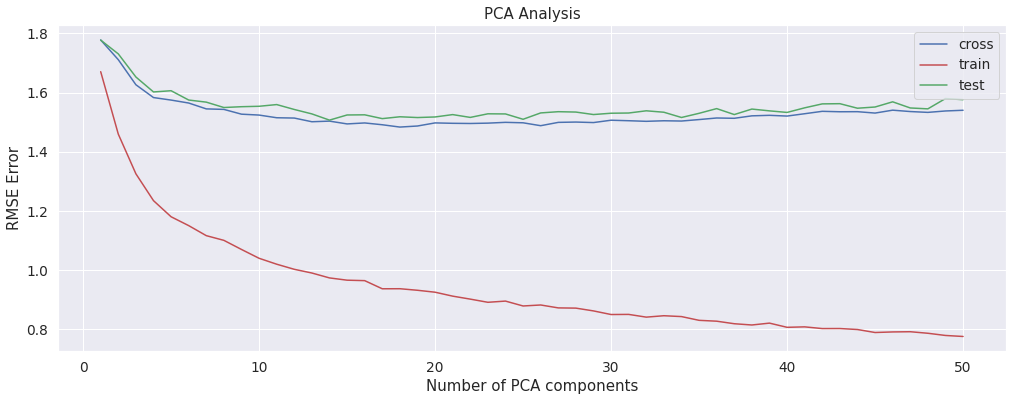

In [57]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', 
              font_scale=1.25, color_codes = 'dark')

# plotting the error analysis to understand the role of the PCA components better.
plt.figure(figsize=(17, 6))
plt.plot(score[0], score[1], color = "b")
plt.plot(score[0], score[2], color = "r")
plt.plot(score[0], score[3], color = "g")
plt.title('PCA Analysis')
plt.ylabel('RMSE Error')
plt.xlabel('Number of PCA components')
plt.legend(['cross','train','test'], loc='upper right')
plt.show()

We are looking at cross validation error , and it seems the first 20 PCA component results in the smallest error with minimal overfitting

#### Sparse Random Projection

In [61]:
from sklearn.random_projection import SparseRandomProjection

srp = SparseRandomProjection(n_components='auto', eps=0.28, dense_output=False)
features_SRP = srp.fit_transform(features)
features_SRP.shape

(4459, 1054)

In [62]:
# now we are training the LightGBM model on the first 100 Sparse Random
# components.
reg = LGBMRegressor(objective='regression', metric='rmse')

score = [[],[],[],[]]

for i in range(1,101,1):
    
    X1, X2, y1, y2 = train_test_split(features_SRP[:,:i], label.values, 
                                      test_size=0.20, random_state=101)
    
    scores = cross_val_score(reg, features_SRP[:,:i], label.values, 
                             cv=cv, scoring='neg_root_mean_squared_error')
    
    reg.fit(X1,y1)
    score[0].append(i)
    score[1].append(-scores.mean())
    score[2].append(np.sqrt((mean_squared_error(y1,reg.predict(X1)))))
    score[3].append(np.sqrt((mean_squared_error(y2,reg.predict(X2)))))

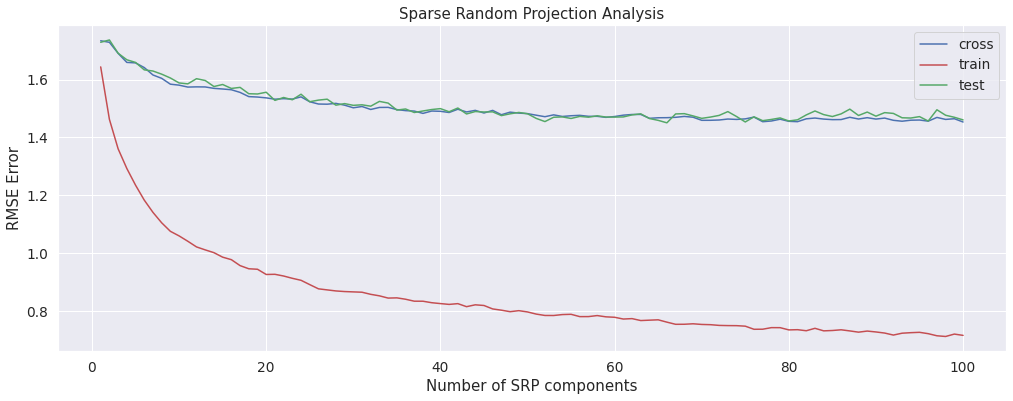

In [63]:

# plotting the error analysis to understand the role of the SRP components better.
plt.figure(figsize=(17, 6))
plt.plot(score[0], score[1], color = "b")
plt.plot(score[0], score[2], color = "r")
plt.plot(score[0], score[3], color = "g")
plt.title('Sparse Random Projection Analysis')
plt.ylabel('RMSE Error')
plt.xlabel('Number of SRP components')
plt.legend(['cross','train','test'], loc='upper right')
plt.show()

It seems that first 75 components results in the smallest error with minimal overfitting of the data. So we will save our 75 SRP components which we will use to expand our dataset.

#### Truncated SVD

In [64]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=1000, algorithm="randomized", n_iter=5, 
                                                  random_state=None, tol=0.0)
features_TSVD = tsvd.fit_transform(features)
tsvd.explained_variance_ratio_.sum()

0.915438660709115

In [65]:
#now we are training the Light GBM on the first 50 TruncatedSVD components.

reg = LGBMRegressor(objective='regression', metric='rmse')

score = [[],[],[],[]]

for i in range(1,51,1):
    
    X1, X2, y1, y2 = train_test_split(features_TSVD[:,:i], label.values, 
                                      test_size=0.20, random_state=101)
    
    scores = cross_val_score(reg, features_TSVD[:,:i], label.values, 
                             cv=cv, scoring='neg_root_mean_squared_error')
    
    reg.fit(X1,y1)
    score[0].append(i)
    score[1].append(-scores.mean())
    score[2].append(np.sqrt((mean_squared_error(y1,reg.predict(X1)))))
    score[3].append(np.sqrt((mean_squared_error(y2,reg.predict(X2)))))

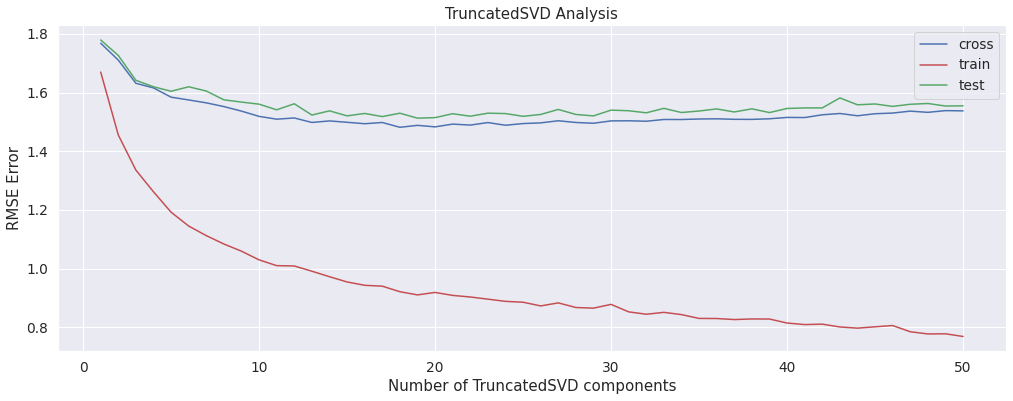

In [66]:
# plotting the error analysis to understand the role of the TruncatedSVD components better.
plt.figure(figsize=(17, 6))
plt.plot(score[0], score[1], color = "b")
plt.plot(score[0], score[2], color = "r")
plt.plot(score[0], score[3], color = "g")
plt.title('TruncatedSVD Analysis')
plt.ylabel('RMSE Error')
plt.xlabel('Number of TruncatedSVD components')
plt.legend(['cross','train','test'], loc='upper right')
plt.show()

We will save first 20 components for data expansion later

#### Non Matrix Factorization

In [67]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=100, init=None, solver="cd", beta_loss="frobenius", 
                        tol=0.0001, max_iter=200, random_state=None, alpha=0.0, 
                                        l1_ratio=0.0, verbose=0, shuffle=False)
features_NMF = nmf.fit_transform(features)

In [68]:
#now we are training the Light GBM on the first 50 NMF components.

reg = LGBMRegressor(objective='regression', metric='rmse')

score = [[],[],[],[]]

for i in range(1,51,1):
    
    X1, X2, y1, y2 = train_test_split(features_NMF[:,:i], label.values, 
                                      test_size=0.20, random_state=101)
    
    scores = cross_val_score(reg, features_NMF[:,:i], label.values, 
                             cv=cv, scoring='neg_root_mean_squared_error')
    
    reg.fit(X1,y1)
    score[0].append(i)
    score[1].append(-scores.mean())
    score[2].append(np.sqrt((mean_squared_error(y1,reg.predict(X1)))))
    score[3].append(np.sqrt((mean_squared_error(y2,reg.predict(X2)))))

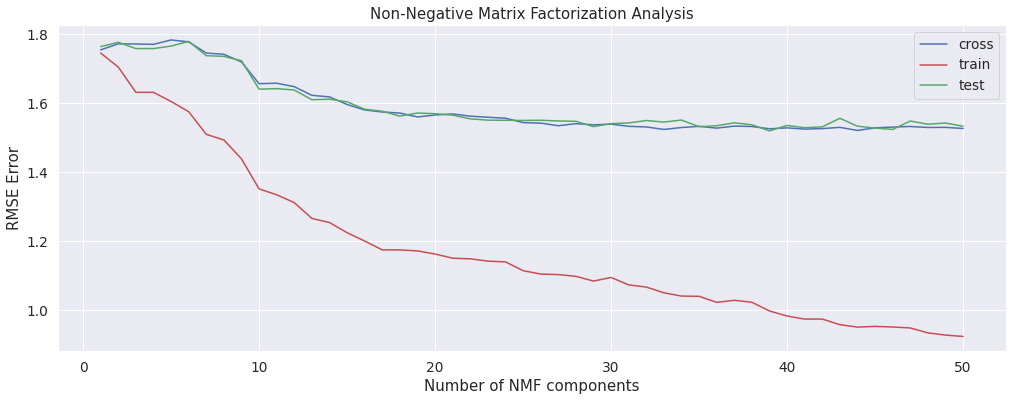

In [70]:
# plotting the error analysis to understand the role of the NMF components better.
plt.figure(figsize=(17, 6))
plt.plot(score[0], score[1], color = "b")
plt.plot(score[0], score[2], color = "r")
plt.plot(score[0], score[3], color = "g")
plt.title('Non-Negative Matrix Factorization Analysis')
plt.ylabel('RMSE Error')
plt.xlabel('Number of NMF components')
plt.legend(['cross','train','test'], loc='upper right')
plt.show()

The NMF first 40 components results in lower cv error with minimum overfitting.

Now we will be concatenating the PCA 20 components, SRP 75 components, and NMF 40 components together and add to our data expansion set

In [71]:
# concatenating the different decomposition components, which will be added to 
# the main data

features_PCA = features_PCA[:, :20]
features_SRP = features_SRP[:, :75]
features_NMF = features_NMF[:, :40]


features_dec = np.hstack((features_SRP, features_PCA, features_NMF))

print(features_dec.shape)

(4459, 135)


Using the above decomposed set of 135 features we will train our lightGBM model to analyze the Cross validation error.

In [72]:
# performing the LightGBM regression on the decomposed training set
#performing Light GBM Regression
model = LGBMRegressor(objective='regression', metric='rmse') 

#performing the cross validation on the entire features set
scores = cross_val_score(model, features_dec, label, 
                            scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.43 (+/- 0.02)
----------------------------------------
Train Error: 0.83
Test Error: 1.47


There has been slight improvement in the cross validation error which suggest that these 135 features actually will impprove our error further

## Feature Selection

Calculating the correlation of the features with the target variable , as we know only a few features are helpful in deciding the target variable.

In [73]:
# performing feature selection  based on the correlation with the label
corr = f_regression(features, label)
f_selection = pd.DataFrame({'importance' : corr[1], 'feature': features.columns}).sort_values(
    by=['importance'], ascending=[False]
)

In [74]:
f_selection.head(5)

,importance,feature
1838,0.999328,4a9e09bff
1477,0.999135,d9c07e001
2289,0.998731,32a20781a
70,0.998655,968b01ca3
3545,0.998392,1938873fd


Now performing the similar plotting curve to determine how many features are useful in determining the target variable

In [76]:
# regressor to work/fit on selected features
reg = LGBMRegressor(objective='regression', metric='rmse')

score = [[],[],[],[]]

num_features = 10

for i in range(30):
    col = pd.DataFrame({'importance' : corr[1], 'feature': features.columns}).sort_values(
    by=['importance'], ascending=[False])[:num_features]['feature'].values

    X1, X2, y1, y2 = train_test_split(features[col], label.values, test_size=0.2,
                                      random_state=101)
    
    scores = cross_val_score(reg, features[col], label.values, cv=cv, 
                             scoring='neg_root_mean_squared_error')
    
    reg.fit(X1[col],y1)
    score[0].append(num_features)
    score[1].append(-scores.mean())
    score[2].append(np.sqrt((mean_squared_error(y1,reg.predict(X1[col])))))
    score[3].append(np.sqrt((mean_squared_error(y2,reg.predict(X2[col])))))
    num_features = int(num_features*1.2)

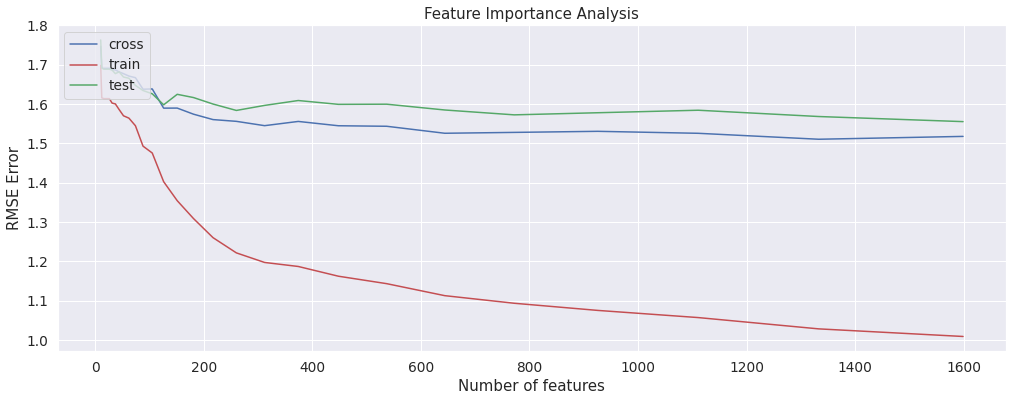

In [77]:
plt.figure(figsize=(17, 6))
plt.plot(score[0], score[1], color = "b")
plt.plot(score[0], score[2], color = "r")
plt.plot(score[0], score[3], color = "g")
plt.title('Feature Importance Analysis')
plt.ylabel('RMSE Error')
plt.xlabel('Number of features')
plt.legend(['cross','train','test'], loc='upper left')
plt.show()

## Feature Important Analysis

In [78]:
# finding the feature importance using the same model
model = LGBMRegressor(objective='regression', metric='rsme')
model.fit(features, label)

LGBMRegressor(metric='rsme', objective='regression')

In [79]:
score = [[],[],[],[]]
num_features=10
reg = LGBMRegressor(objective='regression', metric='rsme')

for i in range(30):
    col = pd.DataFrame({'importance': model.feature_importances_,
                    'feature': features.columns}).sort_values(by=['importance'], 
                    ascending=[False])[:num_features]['feature'].values

    X1, X2, y1, y2 = train_test_split(features[col], label.values, test_size=0.2,
                                      random_state=101)
    
    scores = cross_val_score(reg, features[col], label.values, cv=cv, 
                             scoring='neg_root_mean_squared_error')
    
    reg.fit(X1[col],y1)
    score[0].append(num_features)
    score[1].append(-scores.mean())
    score[2].append(np.sqrt((mean_squared_error(y1,reg.predict(X1[col])))))
    score[3].append(np.sqrt((mean_squared_error(y2,reg.predict(X2[col])))))

    num_features = int(num_features*1.15)

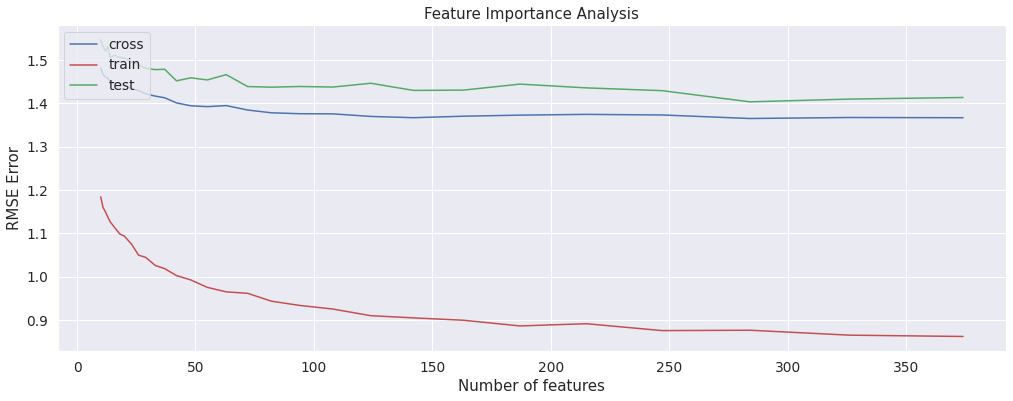

In [80]:
plt.figure(figsize=(17, 6))
plt.plot(score[0], score[1], color = "b")
plt.plot(score[0], score[2], color = "r")
plt.plot(score[0], score[3], color = "g")
plt.title('Feature Importance Analysis')
plt.ylabel('RMSE Error')
plt.xlabel('Number of features')
plt.legend(['cross','train','test'], loc='upper left')
plt.show()

We now can see that after 150 features the error does not improve any further.

In [81]:
# now from the above diagram we concluded that top 150 features are important
num_features = 150

col = pd.DataFrame({'importance': model.feature_importances_, 
                    'feature': features.columns}).sort_values(by=['importance'], 
                            ascending=[False])[:num_features]['feature'].values

features = features[col]
print(features.shape)

(4459, 150)


In [110]:
type(col)

numpy.ndarray

In [111]:
col = list(col)

In [112]:
type(col)

list

In [113]:
# pickling the important columns
import pickle
pickle.dump(col, open('impCol.pkl','wb'))

In [82]:
# the feature matrix features have been reduced to 150

# performing train test split on the reduced feature matrix
X_train, X_test, y_train, y_test = train_test_split(features, label.values,
                                                    test_size = 0.2, 
                                                    random_state=101)

#performing the cross validation on the entire features set
scores = cross_val_score(model, features, label, 
                            scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.37 (+/- 0.04)
----------------------------------------
Train Error: 0.90
Test Error: 1.43


#### Hyper Parameter Tuning

Now we will use Randomized Search CV to look for best parameters for our LightGBM model

In [83]:
param_distributions = {
    'num_leaves' : list(range(5,150,5)),
    'min_data_in_leaf' : list(range(10,32,2)),
    'max_bin' : list(range(50,1500,50)),
    'learning_rate' : list([0.1, 0.075, 0.05, 0.025,  0.01, 0.0075, 0.005, 
                            0.0025,0.001, 0.00075, 0.0005, 0.00025, 0.0001]),
    'n_estimators' : list(range(50,1300,50)),
    'num_iterations' : list(range(15, 450,15)),
    'boosting_type' : list(['gbdt', 'rf', "dart", 'goss']),
    'max_depth' : list(range(2,22,1)),
    'bagging_fraction' : list([0.6, 0.63, 0.66, 0.69, 0.72, 0.75, 0.78, 0.81,
                               0.84, 0.87, 0.90, 0.93, 0.96, 0.99]),
    'bagging_freq' : list(range(2,11,1)),
    'feature_fraction' : list([0.7, 0.73, 0.76, 0.79, 0.82, 0.85, 0.88, 0.91,
                               0.94, 0.97, 1.0]),
    'lambda_l1' :  list(([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4, 
                          0.45, 0.5 ,0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 
                          0.9 , 0.95])),

    'lambda_l2' : list([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 
                        0.45, 0.5 ,0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 
                        0.9 , 0.95]),
                       }

In [84]:
from sklearn.model_selection import RandomizedSearchCV
lgbm = LGBMRegressor(objective='regression', metric='rmse')

model = RandomizedSearchCV(estimator = lgbm,
                           param_distributions = param_distributions,
                           scoring='neg_root_mean_squared_error',
                           verbose=10,
                           cv=cv, 
                           n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(features, label.values,
                                                    test_size = 0.2, 
                                                    random_state=101)

model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=101, test_size=0.2, train_size=None),
                   estimator=LGBMRegressor(metric='rmse',
                                           objective='regression'),
                   n_jobs=-1,
                   param_distributions={'bagging_fraction': [0.6, 0.63, 0.66,
                                                             0.69, 0.72, 0.75,
                                                             0.78, 0.81, 0.84,
                                                             0.87, 0.9, 0.93,
                                                             0.96, 0.99],
                                        'bagging_freq': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10],
                                        'boosting_type': ['gbdt', 'rf', 'dart',
                                                          'g...
                                                         500, 550, 600,

In [87]:
model.best_params_

{'num_leaves': 10,
 'num_iterations': 435,
 'n_estimators': 250,
 'min_data_in_leaf': 30,
 'max_depth': 20,
 'max_bin': 250,
 'learning_rate': 0.01,
 'lambda_l2': 0.05,
 'lambda_l1': 0.55,
 'feature_fraction': 0.73,
 'boosting_type': 'gbdt',
 'bagging_freq': 2,
 'bagging_fraction': 0.63}

In [89]:
best_model=model.best_params_

In [91]:
best_model = LGBMRegressor(objective='regression', metric='rmse',
                        bagging_fraction= 0.6,
                        bagging_freq= 4,
                         boosting_type= 'gbdt',
                         feature_fraction= 0.91,
                         lambda_l1= 0.45,
                         lambda_l2= 0.4,
                         learning_rate= 0.01,
                         max_bin= 800,
                         max_depth= 16,
                         min_data_in_leaf= 16,
                         n_estimators= 250,
                         num_iterations= 435,
                         num_leaves=65
                     )

In [92]:
#performing the cross validation on the entire features set
scores = cross_val_score(best_model, features, label, 
                            scoring='neg_root_mean_squared_error',
                        cv=cv, n_jobs=-1)

score_mean = scores.mean()
score_std = scores.std()

print(f"Cross Validation Error: {-score_mean:.2f} (+/- {score_std:.2f})")

# fitting the model with train dataset 
best_model.fit(X_train,y_train)

# gettting the train score
train_error = np.sqrt(mean_squared_error(y_train,best_model.predict(X_train)))

                      
# getting the test score
test_error = np.sqrt(mean_squared_error(y_test,best_model.predict(X_test)))

print("----------------------------------------")
print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

Cross Validation Error: 1.37 (+/- 0.05)
----------------------------------------
Train Error: 1.01
Test Error: 1.43


In [120]:
import pickle
pickle.dump(best_model, open('best_model.pkl','wb'))